In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from geopy.distance import geodesic
from geopy.point import Point

# 读取csv文件
df = pd.read_csv('data.csv')

# 剔除美国海外地区
excluded_areas = ['American Samoa', 'Diamond Princess', 'Grand Princess', 'Guam', 'Hawaii', 'Alaska', 'Northern Mariana Islands',
                 'Virgin Islands', 'Puerto Rico']
df = df[~df['Province_State'].isin(excluded_areas)]

# 定义一个函数来将经纬度转换为直角坐标
def latlong_to_cartesian(lat, long, earth_radius=6371):
    lat, long = np.radians(lat), np.radians(long)  # 转换为弧度
    x = earth_radius * np.cos(lat) * np.cos(long)
    y = earth_radius * np.cos(lat) * np.sin(long)
    return x, y

# 将经纬度转换为直角坐标
df['x'], df['y'] = zip(*df.apply(lambda row: latlong_to_cartesian(row['Lat'], row['Long_']), axis=1))

# 初始化图形
fig, ax = plt.subplots(figsize=(15, 10), dpi=500)  # 调整图像尺寸

# 设置图像美化样式
plt.style.use('seaborn-darkgrid') # 设置图像样式
plt.title('Geographical Visualization of US States', fontsize=16, fontweight='bold') # 设置标题
# plt.xlabel('X Coordinate', fontsize=14) # 设置x轴标签
# plt.ylabel('Y Coordinate', fontsize=14) # 设置y轴标签
ax.tick_params(labelsize=12) # 设置刻度字体大小

# 给每个省分配一个颜色
colors = list(mcolors.CSS4_COLORS.keys())
np.random.shuffle(colors)  # 打乱颜色列表
color_map = {state: colors[i] for i, state in enumerate(df['Province_State'].unique())}

# 画出点并添加图例
for i, row in df.iterrows():
    ax.scatter(row['x'], row['y'], color=color_map[row['Province_State']], alpha=1, edgecolors='k', linewidths=1, s=200, label=row['Province_State'], zorder=9999)

# 创建图例
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
num_labels = len(by_label)
num_cols = min(num_labels, 8)  # 每行最多显示4个标签，可以根据需要调整

# 计算图例的行数
num_rows = num_labels // num_cols
if num_labels % num_cols != 0:
    num_rows += 1

plt.legend(by_label.values(), by_label.keys(), loc='lower center', ncol=num_cols, fontsize=8, bbox_to_anchor=(0.5, -0.2))


# 计算每两点之间的距离，并生成距离矩阵
distances = []
for i in range(len(df)):
    for j in range(i+1, len(df)):
        p1 = Point(df.iloc[i]['Lat'], df.iloc[i]['Long_'])
        p2 = Point(df.iloc[j]['Lat'], df.iloc[j]['Long_'])
        distance = geodesic(p1, p2).km
        distances.append(distance)

# 归一化距离数据
normalized_distances = (distances - np.min(distances)) / (np.max(distances) - np.min(distances))

# 绘制连线并使用灰度表示距离远近
for i in range(len(df)):
    for j in range(i+1, len(df)):
        p1 = Point(df.iloc[i]['Lat'], df.iloc[i]['Long_'])
        p2 = Point(df.iloc[j]['Lat'], df.iloc[j]['Long_'])
        distance = geodesic(p1, p2).km
        normalized_distance = normalized_distances[i*(len(df)-i-1)//2 + j-i-1]
        gray_value = 1 - normalized_distance  # 灰度值
        ax.plot([df.iloc[i]['x'], df.iloc[j]['x']], [df.iloc[i]['y'], df.iloc[j]['y']], color=str(gray_value), linewidth=1)

#plt.savefig('US States.png')
plt.show()


In [ ]:
# 计算距离矩阵
distance_matrix = np.zeros((len(df), len(df)))
for i in range(len(df)):
    for j in range(i+1, len(df)):
        distance = geodesic((df.iloc[i]['Lat'], df.iloc[i]['Long_']), (df.iloc[j]['Lat'], df.iloc[j]['Long_'])).km
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance

# 绘制灰度图
plt.figure(figsize=(12, 12), dpi=500)  # 调整图像尺寸
plt.imshow(distance_matrix, cmap='gray_r', vmin=np.min(distance_matrix), vmax=np.max(distance_matrix))
plt.colorbar(label='Distance (km)')
plt.title('Distance Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Province')
plt.ylabel('Province')

# 调整坐标刻度
plt.xticks(np.arange(len(df)), df['Province_State'], rotation=90, fontsize=8)
plt.yticks(np.arange(len(df)), df['Province_State'], fontsize=8)

plt.savefig('')
plt.show()


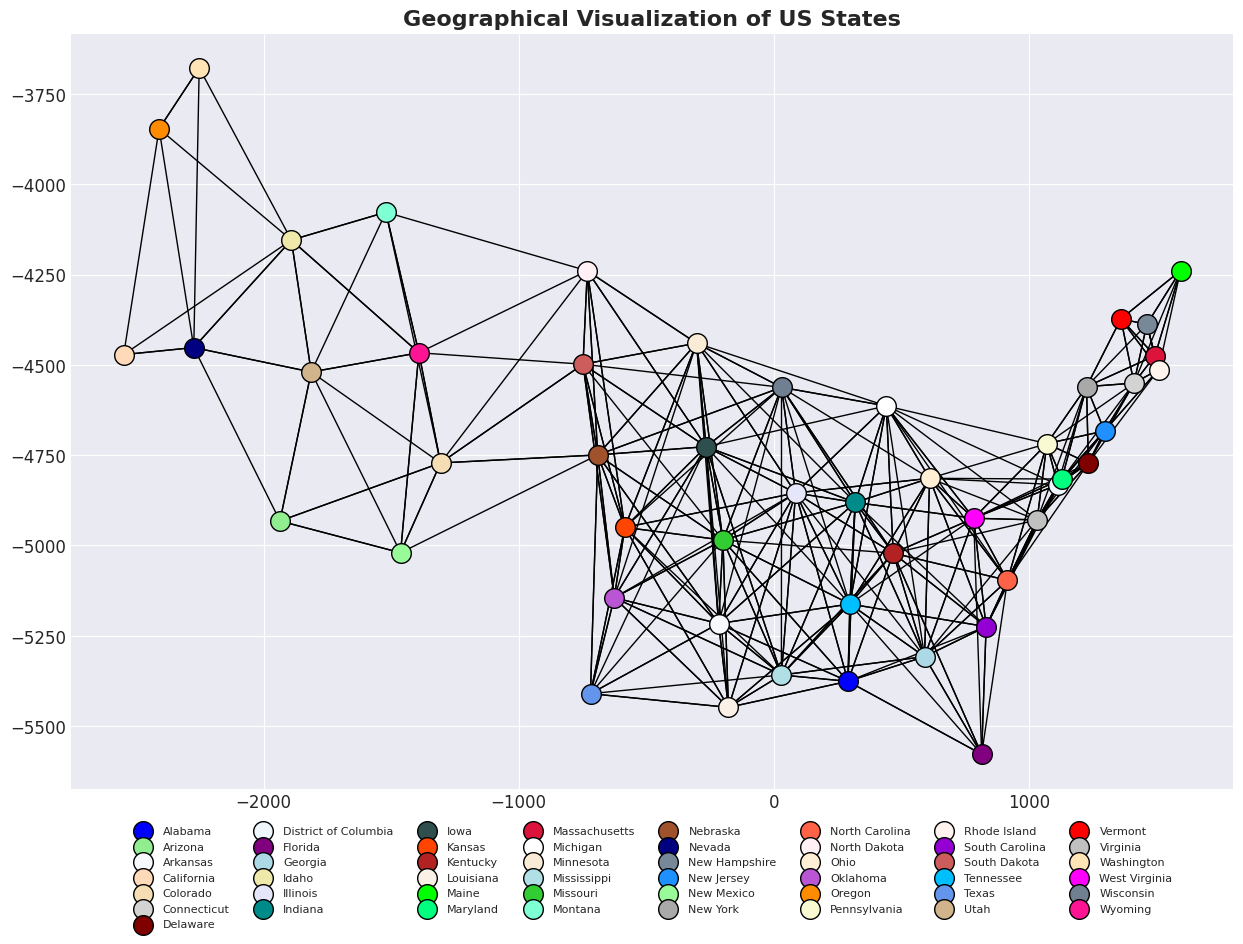

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from geopy.distance import geodesic
from geopy.point import Point
from scipy.spatial.distance import squareform, pdist

# 读取csv文件
df = pd.read_csv('data.csv')

# 剔除美国海外地区
excluded_areas = ['American Samoa', 'Diamond Princess', 'Grand Princess', 'Guam', 'Hawaii', 'Alaska', 'Northern Mariana Islands',
                 'Virgin Islands', 'Puerto Rico']
df = df[~df['Province_State'].isin(excluded_areas)]

# 定义一个函数来将经纬度转换为直角坐标
def latlong_to_cartesian(lat, long, earth_radius=6371):
    lat, long = np.radians(lat), np.radians(long)  # 转换为弧度
    x = earth_radius * np.cos(lat) * np.cos(long)
    y = earth_radius * np.cos(lat) * np.sin(long)
    return x, y

# 将经纬度转换为直角坐标
df['x'], df['y'] = zip(*df.apply(lambda row: latlong_to_cartesian(row['Lat'], row['Long_']), axis=1))

# 初始化图形
fig, ax = plt.subplots(figsize=(15, 10), dpi=100)  # 调整图像尺寸

# 设置图像美化样式
plt.style.use('seaborn-darkgrid') # 设置图像样式
plt.title('Geographical Visualization of US States', fontsize=16, fontweight='bold') # 设置标题
# plt.xlabel('X Coordinate', fontsize=14) # 设置x轴标签
# plt.ylabel('Y Coordinate', fontsize=14) # 设置y轴标签
ax.tick_params(labelsize=12) # 设置刻度字体大小

# 给每个省分配一个颜色
colors = list(mcolors.CSS4_COLORS.keys())
np.random.shuffle(colors)  # 打乱颜色列表
color_map = {state: colors[i] for i, state in enumerate(df['Province_State'].unique())}

# 画出点并添加图例
for i, row in df.iterrows():
    ax.scatter(row['x'], row['y'], color=color_map[row['Province_State']], alpha=1, edgecolors='k', linewidths=1, s=200, label=row['Province_State'], zorder=9999)

# 创建图例
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
num_labels = len(by_label)
num_cols = min(num_labels, 8)  # 每行最多显示4个标签，可以根据需要调整

# 计算图例的行数
num_rows = num_labels // num_cols
if num_labels % num_cols != 0:
    num_rows += 1

plt.legend(by_label.values(), by_label.keys(), loc='lower center', ncol=num_cols, fontsize=8, bbox_to_anchor=(0.5, -0.2))

# 计算每两点之间的距离矩阵
dist_matrix = squareform(pdist(df[['x', 'y']], metric='euclidean'))

# 计算每个节点与其他节点的距离总和
total_distances = np.sum(dist_matrix, axis=1) - np.diag(dist_matrix)

# 对节点距离总和进行降序排序
sorted_indices = np.argsort(total_distances)[::-1]

# 将排序结果映射到[3, 15]的整数区间内
min_mapped_value = 3
max_mapped_value = 15
mapped_values = np.linspace(min_mapped_value, max_mapped_value, len(df)).astype(int)

# 构建节点连接关系
connections = {}
for i, idx in enumerate(sorted_indices):
    n = mapped_values[i]
    nearest_indices = np.argsort(dist_matrix[idx])[1:n+1]
    connections[idx] = nearest_indices
    
for i, idx in enumerate(sorted_indices):
    for j in connections[idx]:
        ax.plot([df.iloc[idx]['x'], df.iloc[j]['x']], [df.iloc[idx]['y'], df.iloc[j]['y']], color='black', linewidth=1)
    
# plt.savefig('US States new.png')
plt.show()


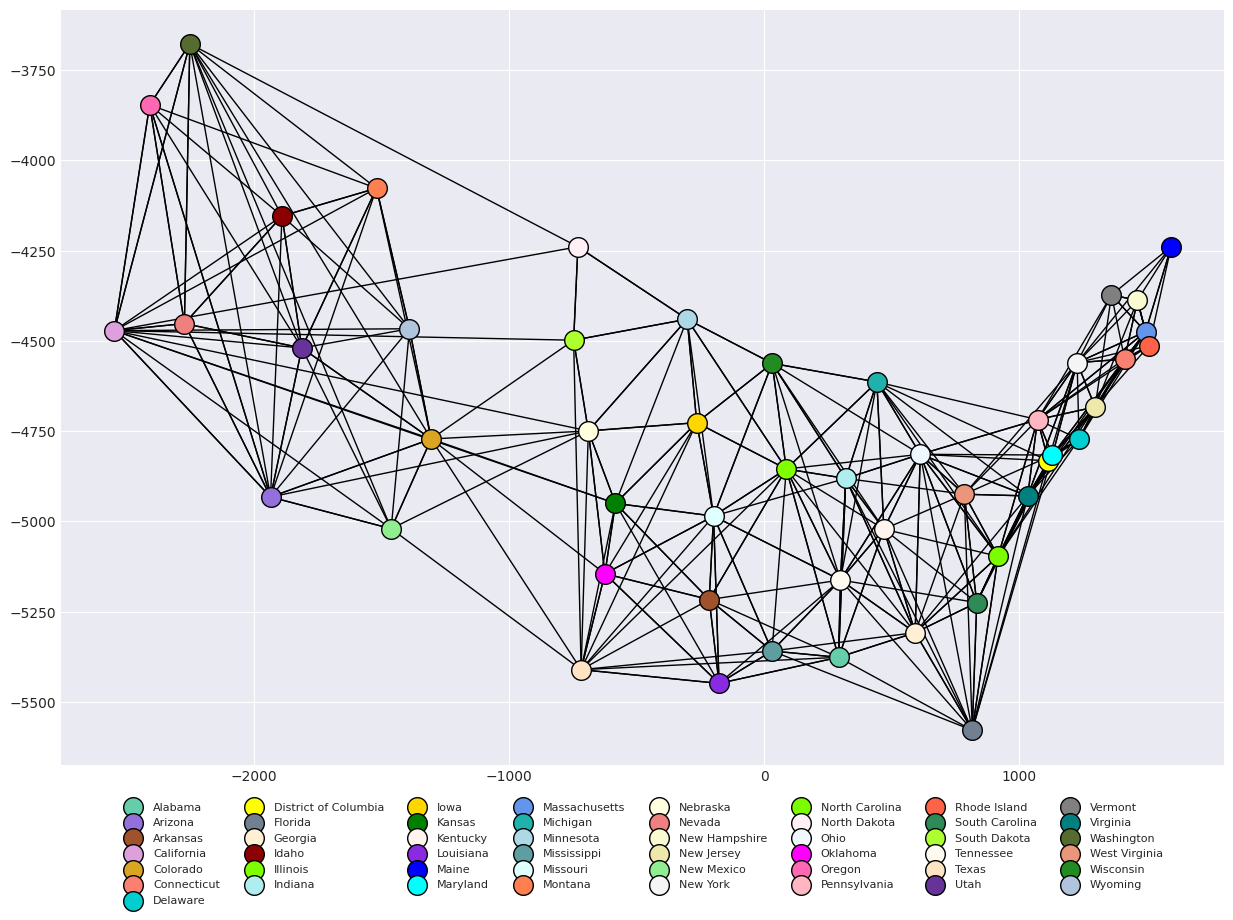

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from geopy.distance import geodesic
from geopy.point import Point
from scipy.spatial.distance import squareform, pdist

# 读取csv文件
df = pd.read_csv('data.csv')

# 剔除美国海外地区
excluded_areas = ['American Samoa', 'Diamond Princess', 'Grand Princess', 'Guam', 'Hawaii', 'Alaska', 'Northern Mariana Islands',
                 'Virgin Islands', 'Puerto Rico']
df = df[~df['Province_State'].isin(excluded_areas)]

# 定义一个函数来将经纬度转换为直角坐标
def latlong_to_cartesian(lat, long, earth_radius=6371):
    lat, long = np.radians(lat), np.radians(long)  # 转换为弧度
    x = earth_radius * np.cos(lat) * np.cos(long)
    y = earth_radius * np.cos(lat) * np.sin(long)
    return x, y

# 将经纬度转换为直角坐标
df['x'], df['y'] = zip(*df.apply(lambda row: latlong_to_cartesian(row['Lat'], row['Long_']), axis=1))

# 计算估计人口
df['Estimated_Population'] = df['Confirmed'] / (df['Incident_Rate'] / 100000)

# 将估计的人口数量进行降序排序
sorted_indices = np.argsort(df['Estimated_Population'].values)

# 将排序结果映射到[3, 15]的整数区间内，这将决定每个节点的连接数
min_mapped_value = 2
max_mapped_value = 14
mapped_values = np.linspace(min_mapped_value, max_mapped_value, len(df)).astype(int)

# 构建节点连接关系
connections = {}
for i, idx in enumerate(sorted_indices):
    n = mapped_values[i]
    
    # 选择最近的n个节点作为连接对象
    nearest_indices = np.argsort(dist_matrix[idx])[:n+1]
    connections[idx] = nearest_indices

    
# 绘图
fig, ax = plt.subplots(figsize=(15, 10), dpi=100)

# 给每个省分配一个颜色
colors = list(mcolors.CSS4_COLORS.keys())
np.random.shuffle(colors)  # 打乱颜色列表
color_map = {state: colors[i] for i, state in enumerate(df['Province_State'].unique())}

# 画出点并添加图例
for i, row in df.iterrows():
    ax.scatter(row['x'], row['y'], color=color_map[row['Province_State']], alpha=1, edgecolors='k', linewidths=1, s=200, label=row['Province_State'], zorder=9999)

# 创建图例
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
num_labels = len(by_label)
num_cols = min(num_labels, 8)  # 每行最多显示4个标签，可以根据需要调整

# 计算图例的行数
num_rows = num_labels // num_cols
if num_labels % num_cols != 0:
    num_rows += 1

plt.legend(by_label.values(), by_label.keys(), loc='lower center', ncol=num_cols, fontsize=8, bbox_to_anchor=(0.5, -0.2))

# 绘制连接线
for i, idx in enumerate(sorted_indices):
    for j in connections[idx]:
        ax.plot([df.iloc[idx]['x'], df.iloc[j]['x']], [df.iloc[idx]['y'], df.iloc[j]['y']], color='black', linewidth=1)
    
# plt.savefig('US States popu.png')
plt.show()


In [6]:
# 统计节点连边数量
edge_counts = {df.iloc[idx]['Province_State']: len(nearest_indices) for idx, nearest_indices in connections.items()}

# 打印每个节点的连边数量
print("Node Edge Counts:")
for state, count in edge_counts.items():
    print(f"{state}: {count}")


Node Edge Counts:
Wyoming: 3
Vermont: 3
District of Columbia: 3
North Dakota: 3
South Dakota: 4
Delaware: 4
Rhode Island: 4
Montana: 4
Maine: 5
New Hampshire: 5
Idaho: 5
West Virginia: 5
Nebraska: 6
New Mexico: 6
Kansas: 6
Mississippi: 6
Arkansas: 7
Nevada: 7
Iowa: 7
Utah: 7
Connecticut: 8
Oklahoma: 8
Oregon: 8
Kentucky: 8
Louisiana: 9
Alabama: 9
South Carolina: 9
Minnesota: 9
Wisconsin: 10
Colorado: 10
Maryland: 10
Missouri: 10
Indiana: 11
Tennessee: 11
Massachusetts: 11
Arizona: 11
Washington: 12
Virginia: 12
New Jersey: 12
Michigan: 12
North Carolina: 13
Georgia: 13
Ohio: 13
Illinois: 13
Pennsylvania: 14
New York: 14
Florida: 14
Texas: 14
California: 15


In [7]:
import os
import fnmatch
from datetime import datetime

# 获得文件夹下所有文件
folder_path = 'dataset'
files = os.listdir(folder_path)

# 仅保留符合日期格式的文件
files = [file for file in files if fnmatch.fnmatch(file, '[0-9][0-9]-[0-9][0-9]-[0-9][0-9][0-9][0-9].csv')]

# 转换文件名到日期并排序
files.sort(key=lambda x: datetime.strptime(x.split('.')[0], '%m-%d-%Y'))

# 需要剔除的州
remove_states = ['American Samoa', 'Diamond Princess', 'Grand Princess', 'Guam', 
                 'Hawaii', 'Alaska', 'Northern Mariana Islands', 'Virgin Islands', 'Puerto Rico', 'Recovered']

In [ ]:
import os
import pandas as pd
from torch_geometric.data import Data
import torch

# 预处理图数据
def preprocess_graph_data(files, folder_path, remove_states):
    data_list = []
    for file in files:
        df = pd.read_csv(os.path.join(folder_path, file))
        df = df[~df['Province_State'].isin(remove_states)]
        features = df[['Confirmed', 'Deaths', 'Incident_Rate', 'Lat', 'Long_']]
        features = features.fillna(df.mean())  # 填充空值
        features = features.values
        node_features = torch.tensor(features, dtype=torch.float)
        # connections = connections  # 这里需要根据你的连接关系填充
        source_nodes = []
        target_nodes = []
        for src, targets in connections.items():
            for tgt in targets:
                source_nodes.append(src)
                target_nodes.append(tgt)
        edge_index = torch.tensor([source_nodes, target_nodes], dtype=torch.long)
        data = Data(x=node_features, edge_index=edge_index)
        data_list.append(data)
    return data_list

# 调用函数进行预处理
data_list = preprocess_graph_data(files, folder_path, remove_states)


In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 对节点特征进行标准化
scaler = StandardScaler()


all_features = np.concatenate([data.x.numpy() for data in data_list], axis=0)


scaler.fit(all_features)

for data in data_list:
    data.x = torch.tensor(scaler.transform(data.x.numpy()), dtype=torch.float)

# 根据时间顺序划分训练集和测试集
num_data = len(data_list)
num_train = int(num_data * 0.8)

train_data_list = data_list[:num_train]
test_data_list = data_list[num_train:]


In [8]:
for i, data in enumerate(data_list):
    if data.x is not None and torch.isnan(data.x).any():
        print(f"Data object at index {i} contains NaN values in node features.")
    if data.edge_index is not None and torch.isnan(data.edge_index).any():
        print(f"Data object at index {i} contains NaN values in edge indices.")

from torch_geometric.data import DataLoader

# 将数据列表转换为DataLoader对象
data_loader = DataLoader(data_list, batch_size=1)

# 将DataLoader对象保存到本地文件
torch.save(data_loader, "data_loader_popu.pth")


/root/miniconda3/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [7]:


class MaskedSelfAttention(nn.Module):
    def __init__(self, in_channels):
        super(MaskedSelfAttention, self).__init__()
        self.query = nn.Linear(in_channels, in_channels)
        self.key = nn.Linear(in_channels, in_channels)
        self.value = nn.Linear(in_channels, in_channels)

    def forward(self, x):
        q = self.query(x)
        k = self.key(x)
        v = self.value(x)

        # 创建一个向下右移的矩阵，用于创建掩码
        mask = torch.tril(torch.ones(x.shape[0], x.shape[0])).to(device)
        mask = mask.expand_as(q @ k.transpose(-2, -1))

        attn_weights = q @ k.transpose(-2, -1) / (self.key.out_features ** 0.5)
        # 使用掩码
        attn_weights = attn_weights.masked_fill(mask == 0, float('-inf'))
        
        attn_weights = F.softmax(attn_weights, dim=-1)

        return attn_weights @ v

class DySAT(nn.Module):
    def __init__(self, in_channels, hidden_channels_1, hidden_channels_2):
        super(DySAT, self).__init__()
        self.spatial_attention = GATConv(in_channels, hidden_channels_1)
        self.linear_1 = nn.Linear(hidden_channels_1, hidden_channels_2)
        self.temporal_attention = MaskedSelfAttention(hidden_channels_2)
        self.linear_2 = nn.Linear(hidden_channels_2, 1)

    def forward(self, data_list):
        output_list = []
        for data in data_list:
            spatial_out = F.relu(self.spatial_attention(data.x, data.edge_index))
            transformed_out = F.relu(self.linear_1(spatial_out))
            output_list.append(transformed_out.unsqueeze(0))
        all_outputs = torch.cat(output_list, dim=0)
        out = self.temporal_attention(all_outputs)
        out = self.linear_2(out)
        return out


In [25]:
class DySAT(nn.Module):
    def __init__(self, in_channels, hidden_channels_1, hidden_channels_2, num_nodes=49):
        super(DySAT, self).__init__()
        self.spatial_attention = GATConv(in_channels, hidden_channels_1)
        self.linear1 = nn.Linear(hidden_channels_1, hidden_channels_2)
        self.gru = nn.ModuleList([nn.GRU(hidden_channels_2, hidden_channels_2, batch_first=True) for _ in range(num_nodes)])
        self.linear2 = nn.Linear(hidden_channels_2, 1)

    def forward(self, data, hidden_state):
        spatial_out = F.relu(self.spatial_attention(data.x, data.edge_index))
        spatial_out = self.linear1(spatial_out)
        outputs = []
        new_hidden_states = []
        for i in range(len(hidden_states)):  # 遍历所有节点
            output, new_hidden_state = self.gru[i](spatial_out[i:i+1].unsqueeze(0), hidden_states[i])
            outputs.append(output)
            new_hidden_states.append(new_hidden_state)
        all_outputs = torch.cat(outputs, dim=0)
        hidden_state = torch.cat(new_hidden_states, dim=1)  # 更新隐藏状态
        out = self.linear2(all_outputs.squeeze(0))
        return out, hidden_state


In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.nn import GCNConv

class TGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels_1, hidden_channels_2, num_layers=3, num_nodes=49, dropout=0.3):
        super(TGCN, self).__init__()
        self.gcn_layers = nn.ModuleList()
        self.gcn_layers.append(GCNConv(in_channels, hidden_channels_1))
        for _ in range(num_layers-1):
            self.gcn_layers.append(GCNConv(hidden_channels_1, hidden_channels_1))
        self.dropout = nn.Dropout(dropout)
        self.linear1 = nn.Linear(hidden_channels_1, hidden_channels_2)
        self.lstm = nn.ModuleList([nn.LSTM(hidden_channels_2, hidden_channels_2, 1, batch_first=True) for _ in range(num_nodes)])
        self.dropout_lstm = nn.Dropout(dropout)
        self.linear2 = nn.Linear(hidden_channels_2, 1)

    def forward(self, data, hidden_states):
        x = data.x
        edge_index = data.edge_index
        for layer in self.gcn_layers:
            x = F.relu(layer(x, edge_index))
            x = self.dropout(x)
        spatial_out = self.linear1(x)
        outputs = []
        new_hidden_states = []
        for i, hidden_state in enumerate(hidden_states):  # 遍历所有节点
            output, new_hidden_state = self.lstm[i](spatial_out[i:i+1].unsqueeze(0), hidden_state)
            # output = self.dropout_lstm(output)
            outputs.append(output)
            new_hidden_states.append((new_hidden_state[0].detach(), new_hidden_state[1].detach()))
        all_outputs = torch.cat(outputs, dim=0)
        out = self.linear2(all_outputs.squeeze(0))
        return out, new_hidden_states, all_outputs


In [64]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
hidden_dim = 64
output_dim = 64

# 创建模型
model = TGCN(5, hidden_dim, output_dim)
model = model.to(device)

# 创建优化器
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# 创建损失函数
criterion = nn.MSELoss()

# 训练
for epoch in range(300): 
    model.train()
    total_train_loss = 0
    hidden_states = [(torch.zeros(1, 1, output_dim).to(device), torch.zeros(1, 1, output_dim).to(device)) for _ in range(49)]
    for i in range(len(train_data_list) - 1):  # -1 
        data_t = train_data_list[i].to(device) 
        data_t_plus_1 = train_data_list[i+1].to(device)  
        optimizer.zero_grad()
        output_t, hidden_states, _ = model(data_t, hidden_states)  
        target = data_t_plus_1.x[:, 0].reshape([49, 1, 1])  
        loss = criterion(output_t, target)
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()


    avg_train_loss = total_train_loss / len(train_data_list)
    # print('Epoch: {}, Train Loss: {:.4f}'.format(epoch, avg_train_loss))

    # 在每个epoch结束后在测试集上评估模型
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        hidden_states = [(torch.zeros(1, 1, output_dim).to(device), torch.zeros(1, 1, output_dim).to(device)) for _ in range(49)]
        for i in range(len(test_data_list) - 1):
            data_t = test_data_list[i].to(device)
            data_t_plus_1 = test_data_list[i+1].to(device) 
            output_t, hidden_states, _ = model(data_t, hidden_states)
            target = data_t_plus_1.x[:, 0].reshape([49, 1, 1])
            test_loss = criterion(output_t, target)
            total_test_loss += test_loss.item()

    avg_test_loss = total_test_loss / len(test_data_list)
    print('Epoch: {}, Train Loss: {:.6f}, Test Loss: {:.6f}'.format(epoch, avg_train_loss, avg_test_loss))


Epoch: 0, Train Loss: 0.022802, Test Loss: 0.040486
Epoch: 1, Train Loss: 0.059089, Test Loss: 0.042031
Epoch: 2, Train Loss: 0.019356, Test Loss: 0.036563
Epoch: 3, Train Loss: 0.005703, Test Loss: 0.033329
Epoch: 4, Train Loss: 0.003885, Test Loss: 0.027828
Epoch: 5, Train Loss: 0.003793, Test Loss: 0.026800
Epoch: 6, Train Loss: 0.003431, Test Loss: 0.027479
Epoch: 7, Train Loss: 0.003365, Test Loss: 0.028033
Epoch: 8, Train Loss: 0.003167, Test Loss: 0.027989
Epoch: 9, Train Loss: 0.003078, Test Loss: 0.026859
Epoch: 10, Train Loss: 0.002652, Test Loss: 0.029050
Epoch: 11, Train Loss: 0.002742, Test Loss: 0.027755
Epoch: 12, Train Loss: 0.002642, Test Loss: 0.026403
Epoch: 13, Train Loss: 0.002369, Test Loss: 0.024916
Epoch: 14, Train Loss: 0.002405, Test Loss: 0.027276
Epoch: 15, Train Loss: 0.002236, Test Loss: 0.026504
Epoch: 16, Train Loss: 0.002026, Test Loss: 0.026529


KeyboardInterrupt: 

In [26]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import os

# 创建用于保存相关系数和嵌入向量的文件夹
if not os.path.exists("correlation_log"):
    os.makedirs("correlation_log")
if not os.path.exists("embedding_log"):
    os.makedirs("embedding_log")

model.eval()  # 切换模型到评估模式

with torch.no_grad():  #
    hidden_states = [(torch.zeros(1, 1, output_dim).to(device), torch.zeros(1, 1, output_dim).to(device)) for _ in range(49)]
    for idx, data in enumerate(data_list):  # 迭代整个数据集
        data = data.to(device)  # 将数据移动到设备上
        _, _, all_outputs = model(data, hidden_states)  # 计算节点嵌入向量
        
        all_outputs = all_outputs.cpu().numpy()  # 将输出的节点嵌入向量从torch.Tensor转换为numpy.ndarray
        correlations = []  # 用于保存所有节点对的相关系数
        for i in range(all_outputs.shape[0]):  # 计算每两个节点的相关系数
            for j in range(i + 1, all_outputs.shape[0]):
                correlation, _ = pearsonr(all_outputs[i][0], all_outputs[j][0])  # 使用 scipy.stats 中的 pearsonr 计算相关系数
                correlations.append([i, j, correlation])
        
        df_corr = pd.DataFrame(correlations, columns=['Node_i', 'Node_j', 'Correlation'])  # 创建包含所有节点对的相关系数的 pandas DataFrame
        df_corr.to_csv(f"correlation_log/correlations_day_{idx}.csv", index=False)  # 保存 DataFrame 到 CSV 文件

        all_outputs_squeezed = np.squeeze(all_outputs, axis=1)  # 去掉不必要的维度
        df_embed = pd.DataFrame(all_outputs_squeezed)  # 创建一个 DataFrame 来保存所有节点的嵌入向量
        df_embed.to_csv(f"embedding_log/embeddings_day_{idx}.csv", index=False)  # 保存嵌入向量的 DataFrame 到 CSV 文件
        

In [39]:
def get_top_correlations(correlation_file):
    # 读取相关性文件
    correlations_df = pd.read_csv(correlation_file)
    
    # 选择每个节点相关性最大的三个节点
    selected_correlations = correlations_df.groupby('Node_i').apply(lambda x: x.nlargest(1, 'Correlation')).reset_index(drop=True)
    
    # 对相关性进行标准化
    min_corr = selected_correlations['Correlation'].min()
    max_corr = selected_correlations['Correlation'].max()
    selected_correlations['Correlation'] = (selected_correlations['Correlation'] - min_corr) / (max_corr - min_corr)

    # 将节点对和相应的相关性作为一个字典返回
    connections = {(row['Node_i'], row['Node_j']): row['Correlation'] for _, row in selected_correlations.iterrows()}
    
    return connections

'''
def get_top_correlations(correlation_file):
    # 读取相关性文件并按照相关性降序排序
    correlations_df = pd.read_csv(correlation_file)
    correlations_df = correlations_df.sort_values('Correlation', ascending=False)

    # 选择相关性最大的100个节点对
    selected_correlations = correlations_df.head(100)

    # 对相关性进行标准化
    min_corr = selected_correlations['Correlation'].min()
    max_corr = selected_correlations['Correlation'].max()
    selected_correlations['Correlation'] = (selected_correlations['Correlation'] - min_corr) / (max_corr - min_corr)

    # 将节点对和相应的相关性作为一个字典返回
    connections = {(row['Node_i'], row['Node_j']): row['Correlation'] for _, row in selected_correlations.iterrows()}
    
    return connections
'''


from matplotlib import colors as mcolors
from matplotlib import pyplot as plt
import glob

# 创建用于保存图形的文件夹
if not os.path.exists("figures"):
    os.makedirs("figures")

# 获取所有的相关性文件
correlation_files = glob.glob("correlation_log/*.csv")

# 对于每一个相关性文件
for idx, correlation_file in enumerate(correlation_files):
    # 获取相关性最大的100个节点对
    connections = get_top_correlations(correlation_file)

    # 使用对应的数据创建一个图形
    fig, ax = plt.subplots(figsize=(15, 10), dpi=100)
    
    # 给每个省分配一个颜色
    colors = list(mcolors.CSS4_COLORS.keys())
    np.random.shuffle(colors)  # 打乱颜色列表
    color_map = {state: colors[i] for i, state in enumerate(df['Province_State'].unique())}

    # 画出点并添加图例
    for i, row in df.iterrows():
        ax.scatter(row['x'], row['y'], color=color_map[row['Province_State']], alpha=1, edgecolors='k', linewidths=1, s=200, label=row['Province_State'], zorder=9999)

    # 创建图例
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    num_labels = len(by_label)
    num_cols = min(num_labels, 8)  # 每行最多显示4个标签，可以根据需要调整

    # 计算图例的行数
    num_rows = num_labels // num_cols
    if num_labels % num_cols != 0:
        num_rows += 1

    plt.legend(by_label.values(), by_label.keys(), loc='lower center', ncol=num_cols, fontsize=8, bbox_to_anchor=(0.5, -0.2))

    # 添加边到图形
    for (i, j), correlation in connections.items():
        ax.plot([df.iloc[int(i)]['x'], df.iloc[int(j)]['x']], [df.iloc[int(i)]['y'], df.iloc[int(j)]['y']], color=plt.get_cmap('Purples')(correlation/ 0.3), linewidth=2)
    
    # 保存图形
    plt.savefig(f"figures/graph_day_{idx}.png")
    plt.close(fig)
    break


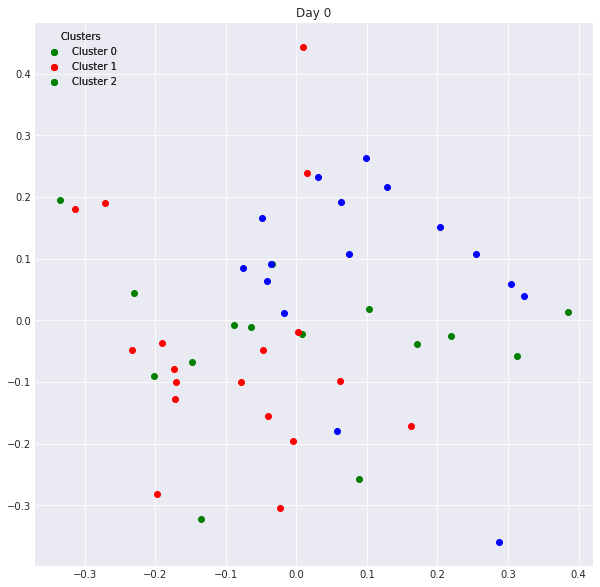

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

# 读取节点名称
df = pd.read_csv('data.csv')
excluded_areas = ['American Samoa', 'Diamond Princess', 'Grand Princess', 'Guam', 'Hawaii', 'Alaska', 'Northern Mariana Islands',
                 'Virgin Islands', 'Puerto Rico']
df = df[~df['Province_State'].isin(excluded_areas)]
node_names = df['Province_State'].unique()

n_clusters = 3  # 设置你想要的簇的数量
n_days = len(os.listdir("embedding_log"))  # 从 "embedding_log" 文件夹中的文件数量来确定天数
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # 为每一个簇定义一个颜色

# 迭代所有天的文件
for day in range(n_days):
    filename = f"embedding_log/embeddings_day_{day}.csv"  # 根据天数生成文件名
    embeddings = pd.read_csv(filename)  # 从 CSV 文件中读取嵌入向量
    
    # 使用 k-means 进行聚类
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings)
    
    # 使用 PCA 将嵌入向量降维到二维
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    
    # 绘制结果
    plt.figure(figsize=(10, 10))
    for i, (x, y) in enumerate(embeddings_2d):
        plt.scatter(x, y, color=colors[kmeans.labels_[i]], label=node_names[i])
    
    # 创建图例
    cluster_labels = []
    for i in range(n_clusters):
        cluster_labels.append(f"Cluster {i}")
    legend1 = plt.legend(cluster_labels, loc="upper left", title="Clusters")
    plt.gca().add_artist(legend1)
    # legend2 = plt.gca().legend(title="Nodes")
    plt.title(f"Day {day}")
    plt.show()
    break


In [26]:
row

Node_i         0.000000
Node_j         1.000000
Correlation    0.336708
Name: 0, dtype: float64

In [36]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

num_nodes = train_data_list[0].x.size(0)  # 获取节点数量

# 创建SVR模型列表
svrs = [SVR(kernel='rbf', C=1e3, gamma=0.1) for _ in range(num_nodes)]

# 训练每一个SVR模型
for i in range(num_nodes):
    X_train = []
    y_train = []
    for data in train_data_list[:-1]:  # 注意我们需要使用 t+1 的数据作为目标，所以这里减去1
        X_train.append(data.x[i].cpu().numpy())  # 获取节点i在时间t的特征
        y_train.append(train_data_list[train_data_list.index(data)+1].x[i, 0].cpu().numpy())  # 获取节点i在时间t+1的第一个特征
    svrs[i].fit(X_train, y_train)

# 在测试集上评估每一个模型，并计算平均测试误差
total_test_loss = 0
for i in range(num_nodes):
    X_test = []
    y_test = []
    for data in test_data_list[:-1]:
        X_test.append(data.x[i].cpu().numpy())
        y_test.append(test_data_list[test_data_list.index(data)+1].x[i, 0].cpu().numpy())
    y_pred = svrs[i].predict(X_test)
    test_loss = mean_squared_error(y_test, y_pred)
    total_test_loss += test_loss

avg_test_loss = total_test_loss / num_nodes

print('Average Test Loss: {:.6f}'.format(avg_test_loss))


Average Test Loss: 0.028401


In [35]:
train_data_list[1].x.numpy()

array([[-0.6600135 , -0.75354993, -1.383756  , -1.5400741 ,  0.26575595],
       [-0.6601207 , -0.7522672 , -1.3862859 , -1.2323422 , -1.3952386 ],
       [-0.6616121 , -0.7574539 , -1.3866631 , -0.9620419 , -0.10470392],
       [-0.64732   , -0.72025436, -1.3855342 , -0.71210283, -1.9539216 ],
       [-0.6545327 , -0.7121675 , -1.3788254 , -0.07039257, -0.98081094],
       [-0.6538328 , -0.7254969 , -1.3570036 ,  0.48289666,  1.2237247 ],
       [-0.66138595, -0.75605965, -1.3745847 , -0.01399519,  1.037391  ],
       [-0.6612579 , -0.75617117, -1.3658766 , -0.10579592,  0.9344833 ],
       [-0.6488692 , -0.73124135, -1.3820469 , -2.5323966 ,  0.61892784],
       [-0.65387565, -0.73313755, -1.3795608 , -1.3825893 ,  0.48645544],
       [-0.6616017 , -0.7575655 , -1.3836778 ,  1.0590103 , -1.6016093 ],
       [-0.6482155 , -0.7145657 , -1.3751917 ,  0.21076436,  0.12464964],
       [-0.6570963 , -0.7321337 , -1.379673  ,  0.10174181,  0.30936477],
       [-0.6614171 , -0.7567847 , -1.3

In [44]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out


In [45]:
# 创建一个列表来存储每个节点的模型
node_models = [LSTMModel(5, 64).to(device) for _ in range(49)]

# 创建优化器和损失函数
optimizers = [torch.optim.Adam(model.parameters(), lr=0.01) for model in node_models]
criterion = nn.MSELoss()

# 训练
for epoch in range(100):
    total_loss = 0
    for node_id in range(49):  # 遍历每个节点
        model = node_models[node_id]
        optimizer = optimizers[node_id]
        for i in range(len(train_data_list) - 1):  # -1 是因为我们需要使用 t+1 的数据作为目标
            optimizer.zero_grad()
            data_t = train_data_list[i].to(device)
            data_t_plus_1 = train_data_list[i+1].to(device)
            node_features_t = data_t.x[node_id, :].unsqueeze(0).unsqueeze(0)  # 取出该节点在 t 时刻的特征
            output_t = model(node_features_t)
            target = data_t_plus_1.x[node_id, 0]  # 假设我们想要预测的是 t+1 时刻的第一个特征
            loss = criterion(output_t, target)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()

    avg_loss = total_loss / (len(train_data_list) * 49)  # 计算平均损失

    # 在每个训练周期结束时进行测试
    if epoch % 2 == 0:  # 每 100 个训练周期进行一次测试
        model.eval()  # 将模型设置为评估模式
        total_test_loss = 0
        with torch.no_grad():  # 在测试阶段，我们不需要计算梯度
            for node_id in range(49):
                model = node_models[node_id]
                for i in range(len(test_data_list) - 1):
                    data_t = test_data_list[i].to(device)
                    data_t_plus_1 = test_data_list[i+1].to(device)
                    node_features_t = data_t.x[node_id, :].unsqueeze(0).unsqueeze(0)
                    output_t = model(node_features_t)
                    target = data_t_plus_1.x[node_id, 0]
                    loss = criterion(output_t, target)
                    total_test_loss += loss.item()

        avg_test_loss = total_test_loss / (len(test_data_list) * 49)
        print(f'Epoch: {epoch}, Train Loss: {avg_loss}, Test Loss: {avg_test_loss}')
        model.train()  # 将模型设置回训练模式


/root/miniconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0, Train Loss: 0.0018387221160142972, Test Loss: 0.013140724223115904
Epoch: 2, Train Loss: 0.0013966767236744599, Test Loss: 0.009611424131972728
Epoch: 4, Train Loss: 0.0008957116683311715, Test Loss: 0.00878937491086773
Epoch: 6, Train Loss: 0.0006671677017289639, Test Loss: 0.008858789027253797
Epoch: 8, Train Loss: 0.0005264435151084908, Test Loss: 0.00868921956777506
Epoch: 10, Train Loss: 0.0005269742071480596, Test Loss: 0.008599127614365758


KeyboardInterrupt: 

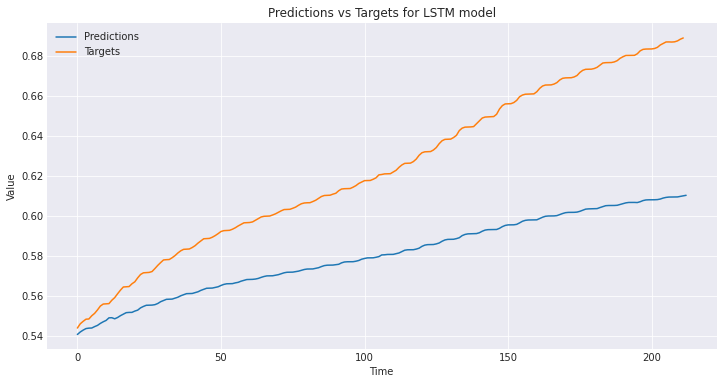

In [58]:
with torch.no_grad():
    # 预测值
    node_predictions = []
    for node_id in range(49):
        model = node_models[node_id]
        node_preds = []
        for data_t in test_data_list:
            data_t = data_t.to(device)
            node_features_t = data_t.x[node_id, :].unsqueeze(0).unsqueeze(0)
            output_t = model(node_features_t)
            node_preds.append(output_t.cpu().numpy().squeeze())
        node_predictions.append(node_preds)

    # 真实值
    targets = [data.x[:, 0] for data in test_data_list[1:]]
    targets = np.array([t.cpu().numpy().squeeze() for t in targets])

    # 计算49个节点的平均值
    predictions_lstm = np.mean(node_predictions, axis=0)
    targets = np.mean(targets, axis=1)

    plt.figure(figsize=(12,6))
    plt.plot(predictions_lstm, label='Predictions')
    plt.plot(targets, label='Targets')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Predictions vs Targets for LSTM model')
    plt.legend()
    plt.show()


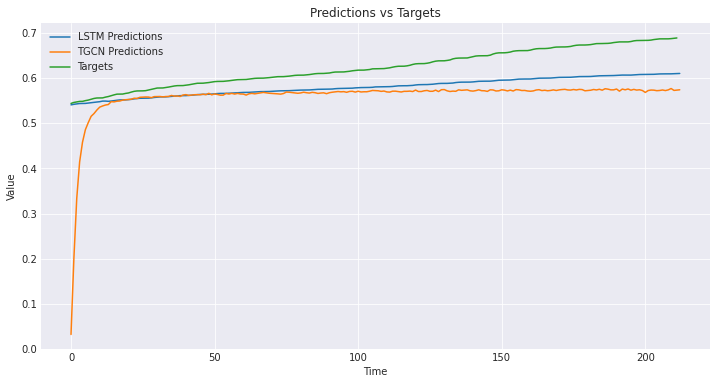

In [63]:
plt.figure(figsize=(12,6))
plt.plot(predictions_lstm, label='LSTM Predictions')
plt.plot(predictions_tgcn, label='TGCN Predictions')
plt.plot(targets, label='Targets')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Predictions vs Targets')
plt.legend()
plt.show()

In [37]:
0.0284 ** 0.5

0.16852299546352717